<a href="https://colab.research.google.com/github/neihtfool/Fully-Connected-Neural-Network/blob/master/Boston_Housing_Price_Regression_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression: Boston Housing

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from tensorflow import keras

In [0]:
print(tf.__version__)

2.1.0


In [0]:
housing = tf.keras.datasets.boston_housing

(x_train_orig, y_train), (x_test_orig, y_test) = housing.load_data()

**The Dataset**

Conveniently, the dataset is available through keras and already prepared into a numpy array

506 samples

13 Features:
```
    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per $10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
```

1 Label: 
```
    - MDEX     Represents the housing price
```

In [0]:
col_titles = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", 
              "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

print("Training set X shape:", x_train_orig.shape)
print("Training set X shape:", y_train.shape)
print("Test set X shape:", x_test_orig.shape)
print("Test set Y shape:", y_test.shape)

Training set X shape: (404, 13)
Training set X shape: (404,)
Test set X shape: (102, 13)
Test set Y shape: (102,)


In [0]:
print(x_train_orig[0])
print(y_train[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
15.2


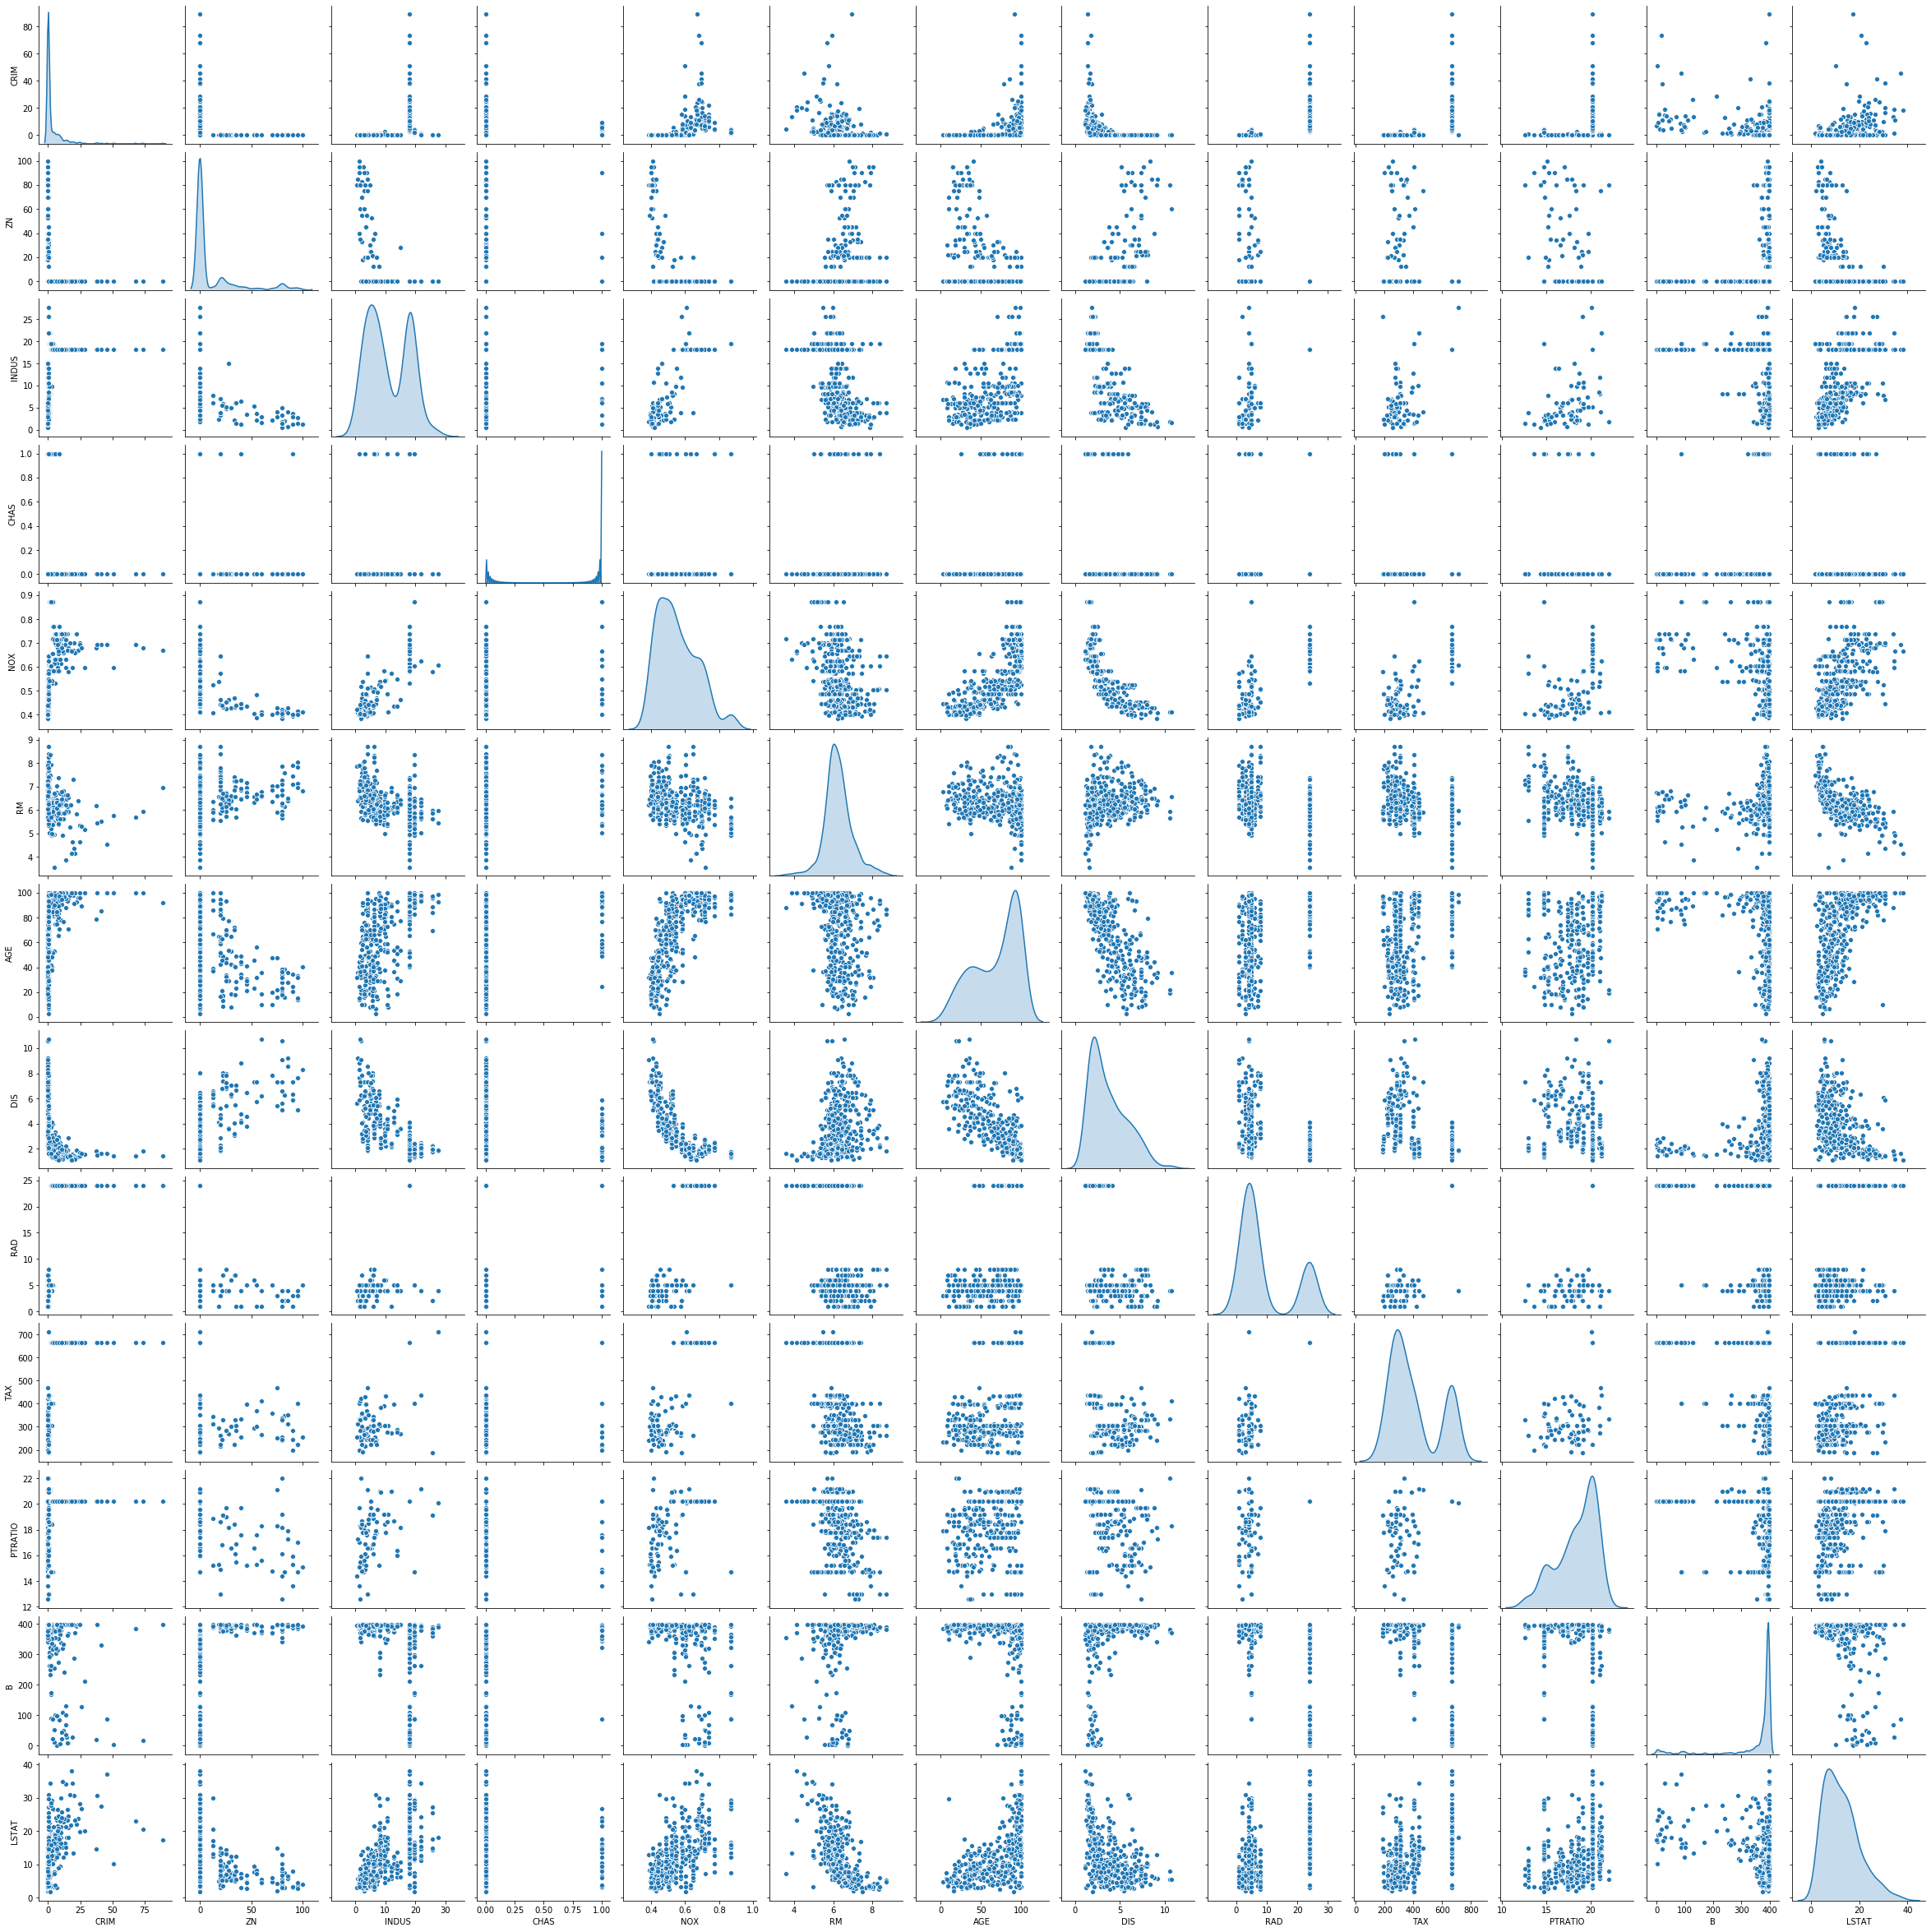

In [0]:
df = pd.DataFrame(data=x_train_orig, columns=col_titles)
sns.pairplot(df, diag_kind="kde")

**Normalizing the data**

In [0]:
def normalize(data):
  data -= data.mean(axis=0)
  data /= data.std(axis=0)
  return data

In [0]:
x_train = normalize(x_train_orig)
x_test = normalize(x_test_orig)

**Modeling the network**

In [0]:
def init_model(X, layer_dims, activation_fn='relu', optimizer='adam', loss='mse'):
  model = keras.models.Sequential()
  for l in layer_dims:
    model.add(keras.layers.Dense(l, activation='relu', input_shape=(X.shape[1],)))

  model.compile(optimizer=optimizer, loss=loss, metrics=['mae'])
  return model
    

Our network consists of 2 hidden layers with 64 neurons each + the output layer with a single neuron

In [0]:
layer_dims = [64, 64, 1]

# Train the model

In [0]:
model_1 = init_model(x_train, layer_dims) # Using adam optimizer
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [0]:
hist = model_1.fit(x_train, y_train, epochs=500)

Train on 404 samples
Epoch 1/500
404/404 [==============================] - 0s 939us/sample - loss: 565.6060 - mae: 21.8709
Epoch 2/500
404/404 [==============================] - 0s 86us/sample - loss: 510.5406 - mae: 20.5536
Epoch 3/500
404/404 [==============================] - 0s 102us/sample - loss: 438.0785 - mae: 18.7736
Epoch 4/500
404/404 [==============================] - 0s 87us/sample - loss: 341.0176 - mae: 16.1893
Epoch 5/500
404/404 [==============================] - 0s 87us/sample - loss: 222.3807 - mae: 12.6051
Epoch 6/500
404/404 [==============================] - 0s 85us/sample - loss: 122.2204 - mae: 8.8940
Epoch 7/500
404/404 [==============================] - 0s 96us/sample - loss: 70.7841 - mae: 6.5795
Epoch 8/500
404/404 [==============================] - 0s 85us/sample - loss: 50.7484 - mae: 5.3881
Epoch 9/500
404/404 [==============================] - 0s 75us/sample - loss: 37.3464 - mae: 4.5525
Epoch 10/500
404/404 [==============================] - 0s 76us/sa

In [0]:
model_1.evaluate(x_test, y_test, verbose=2)

102/102 - 0s - loss: 18.9928 - mae: 2.8613


[18.992807276108685, 2.8613243]

In [0]:
model_2 = init_model(x_train, layer_dims, optimizer="rmsprop") # use RMSprop optimizer
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [0]:
hist_2 = model_2.fit(x_train, y_train, epochs=500)

Train on 404 samples
Epoch 1/500
404/404 [==============================] - 0s 1ms/sample - loss: 534.4313 - mae: 21.2943
Epoch 2/500
404/404 [==============================] - 0s 71us/sample - loss: 450.4860 - mae: 19.3012
Epoch 3/500
404/404 [==============================] - 0s 62us/sample - loss: 357.3857 - mae: 16.9557
Epoch 4/500
404/404 [==============================] - 0s 61us/sample - loss: 257.4914 - mae: 14.1212
Epoch 5/500
404/404 [==============================] - 0s 59us/sample - loss: 164.4545 - mae: 10.8657
Epoch 6/500
404/404 [==============================] - 0s 64us/sample - loss: 97.1550 - mae: 7.8570
Epoch 7/500
404/404 [==============================] - 0s 62us/sample - loss: 59.8448 - mae: 5.8900
Epoch 8/500
404/404 [==============================] - 0s 75us/sample - loss: 42.7357 - mae: 4.8558
Epoch 9/500
404/404 [==============================] - 0s 67us/sample - loss: 33.9150 - mae: 4.2497
Epoch 10/500
404/404 [==============================] - 0s 60us/sample

In [0]:
print("model /w adam:", model_1.evaluate(x_test, y_test, verbose=2))
print("model /w RMSprop:", model_2.evaluate(x_test, y_test, verbose=2))


102/102 - 0s - loss: 18.9928 - mae: 2.8613
model /w adam: [18.992807276108685, 2.8613243]
102/102 - 0s - loss: 17.9934 - mae: 2.8542
model /w RMSprop: [17.99344814524931, 2.8542001]


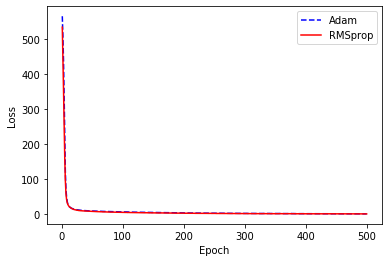

In [0]:
training_loss_1 = hist.history['loss']
epoch_count = range(1, len(training_loss_1) +1)
training_loss_2 = hist_2.history['loss']

plt.plot(epoch_count, training_loss_1, 'b--')
plt.plot(epoch_count_2, training_loss_2, 'r-')
plt.legend(["Adam", "RMSprop"])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Lets add some validation and some other adjustmens to the model training

In [0]:
model_3 = init_model(x_train, layer_dims)
hist_3 = model_3.fit(x_train, y_train, epochs=1000, validation_split=0.2)

Train on 323 samples, validate on 81 samples
Epoch 1/1000
323/323 [==============================] - 0s 1ms/sample - loss: 557.3246 - mae: 21.7793 - val_loss: 604.0089 - val_mae: 22.8286
Epoch 2/1000
323/323 [==============================] - 0s 107us/sample - loss: 519.9872 - mae: 20.9026 - val_loss: 557.5561 - val_mae: 21.7815
Epoch 3/1000
323/323 [==============================] - 0s 105us/sample - loss: 471.7157 - mae: 19.7001 - val_loss: 497.7830 - val_mae: 20.3514
Epoch 4/1000
323/323 [==============================] - 0s 117us/sample - loss: 410.8905 - mae: 18.0829 - val_loss: 419.0866 - val_mae: 18.3924
Epoch 5/1000
323/323 [==============================] - 0s 125us/sample - loss: 330.9233 - mae: 15.8418 - val_loss: 321.4012 - val_mae: 15.6613
Epoch 6/1000
323/323 [==============================] - 0s 109us/sample - loss: 240.0138 - mae: 13.1008 - val_loss: 218.9905 - val_mae: 12.4227
Epoch 7/1000
323/323 [==============================] - 0s 119us/sample - loss: 151.3911 - ma

In [0]:
model_3.evaluate(x_test, y_test, verbose=2)

102/102 - 0s - loss: 18.2870 - mae: 2.9813


[18.287006602567786, 2.981348]

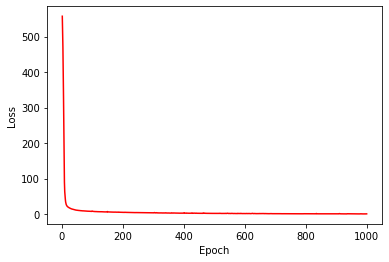

In [0]:
training_loss_3 = hist_3.history['loss']
epoch_count_3 = range(1, len(training_loss_3) +1)

plt.plot(epoch_count_3, training_loss_3, 'r-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Predictions

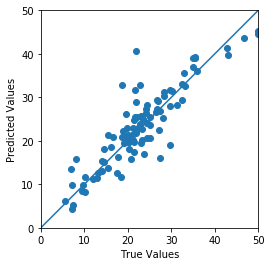

In [0]:
test_preds = model_3.predict(x_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_preds)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
l = [0, 50]
plt.xlim(l)
plt.ylim(l)
plt.plot(l, l)

The predictions seems okay. With more validaiton, dropout layers or more data we could maybe perform better. Not let's have a look at the error distribution.

Text(0, 0.5, 'Count')

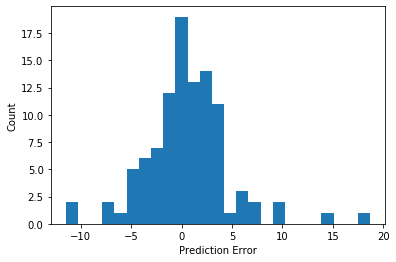

In [0]:
err = test_preds - y_test
plt.hist(err, bins=25)
plt.xlabel("Prediction Error")
plt.ylabel("Count")

It approximately looks like a gaussian distribution!